学习完可视化之后，我们进入描述性统计的部分，得到一个数据集后，一般我们会通过简单的描述性统计和可视化进行探索性分析，再用一些经典算法进一步分析，或者在经典算法的基础上建模分析。书中通过两个例子来介绍这一过程，这篇笔记跟着课本的做法训练描述性统计与建模能力。


### 目录
- 葡萄酒数据探索与建模
- 客户流失数据统计

## 葡萄酒数据探索与建模 

### 葡萄酒质量数据集


葡萄酒质量数据集包括两个文件，一个是红葡萄酒数据文件，另一个是白葡萄酒数据文件，白葡萄酒是著名的葡萄牙“Vinho Verde”葡萄酒的一个变种。红葡萄酒文件中包含1599 条记录，白葡萄酒文件中包含 4898 条记录。两个文件中都有 1 个输出变量和 11 个输入变量。输出变量是酒的质量，是一个从 0（低质量）到 10（高质量）的评分。输入变量是葡萄酒的物理化学成分和特性，包括非挥发性酸、挥发性酸、柠檬酸、残余糖分、氯化物、游离二氧化硫、总二氧化硫、密度、pH 值、硫酸盐和酒精含量。原始数据可从[UCI.EDU](http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality)获取，我们不对这两个数据集分别进行分析，而是将它们合成了一个数据集。当你将红葡萄酒数据和白葡萄酒数据合成一个文件后，结果数据集中应该包括一个标题行和 6497 条记录。另外，还应该再添加一列，用来区分这行数据是红葡萄酒还是白葡萄酒的数据。这个文件可以从[原书作者GitHub](https://github.com/cbrownley/foundations-for-analytics-with-python/blob/master/statistics/winequality-both.csv)获取。将文件命名为winequality.csv 。
下面进行这个数据的描述性统计。


### 描述性统计

计算和显示基本统计量

In [3]:
import numpy as np
import pandas as pd

#引入需要的库，除了statsmodels外都是我们学过的库。

# 读入数据集
wineDF = pd.read_csv('./winequality.csv', sep=',', header=0)
wineDF.columns = wineDF.columns.str.replace(' ', '_')

print(wineDF.describe())  #describe()是很实用的函数，输出基本统计量。
#包括总数、均值、标准差、最小值、中位数、最大值等

print(wineDF.quality.value_counts()) # 计算值的频率 

       fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free_sulfur_dioxide  total_sulfur_dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000             1.000000         

前面计算出的统计量是针对整个数据集的，既包括红葡萄酒数据也包括白葡萄酒数据。下面我们分别分析红葡萄酒数据和白葡萄酒数据，看看统计量是否会保持不变：

用 seaborn 创建一幅统计图，其中有两个直方图，一个表示红葡萄酒，另一个
表示白葡萄酒

E:\LcfSoftware\Anaconda201704\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


                type 
quality  count  red      1599.000000
                white    4898.000000
         mean   red         5.636023
                white       5.877909
         std    red         0.807569
                white       0.885639
         min    red         3.000000
                white       3.000000
         25%    red         5.000000
                white       5.000000
         50%    red         6.000000
                white       6.000000
         75%    red         6.000000
                white       6.000000
         max    red         8.000000
                white       9.000000
dtype: float64
     quality      
type     red white
0.25     5.0   5.0
0.75     6.0   6.0
Axes(0.125,0.125;0.775x0.755)
Axes(0.125,0.125;0.775x0.755)
        quality
            std
type           
red    0.807569
white  0.885639
tstat: -9.68564955419 ;pvalue:  4.8880690442e-22


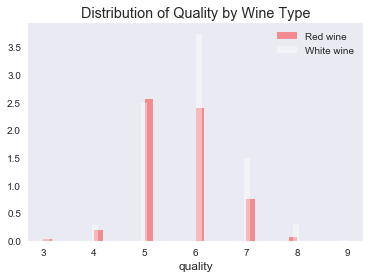

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

%matplotlib inline  
plt.style.use('ggplot')

# 按照葡萄酒类型显示质量的描述性统计量 
print(wineDF.groupby('type')[['quality']].describe().unstack('type')) 
# 按照葡萄酒类型显示质量的特定分位数值 
print(wineDF.groupby('type')[['quality']].quantile([0.25, 0.75]).unstack('type')) 
# 按照葡萄酒类型查看质量分布 
red_wine = wineDF.loc[wineDF['type']=='red', 'quality'] 
white_wine = wineDF.loc[wineDF['type']=='white', 'quality'] 
sns.set_style("dark") 
print(sns.distplot(red_wine, norm_hist=True, kde=False, color="red", label="Red wine")) 
print(sns.distplot(white_wine,norm_hist=True, kde=False, color="white", label="White wine")) 

plt.title("Distribution of Quality by Wine Type") 
plt.legend() 
# 检验红葡萄酒和白葡萄酒的平均质量是否有所不同 
print(wineDF.groupby(['type'])[['quality']].agg(['std'])) 
tstat, pvalue, df = sm.stats.ttest_ind(red_wine, white_wine) 
print('tstat:',tstat,';pvalue: ' ,pvalue)

上面的直方图中，红条表示红葡萄酒，白条表示白葡萄酒。因为白葡萄酒数据比红葡萄酒多，所以图中显示密度分布，不显示频率分布。从这个统计图可以看出，两种葡萄酒的评分都近似正态分布。与原始数据的摘要统计量相比，直方图更容易看出两种葡萄酒的质量评分的分布。

前面已经检查了输出变量，下面简单研究一下输入变量。让我们计算一下输入变量两两之间的相关性，并为一些输入变量创建带有回归直线的散点图：

                      fixed_acidity  volatile_acidity  citric_acid  \
fixed_acidity              1.000000          0.219008     0.324436   
volatile_acidity           0.219008          1.000000    -0.377981   
citric_acid                0.324436         -0.377981     1.000000   
residual_sugar            -0.111981         -0.196011     0.142451   
chlorides                  0.298195          0.377124     0.038998   
free_sulfur_dioxide       -0.282735         -0.352557     0.133126   
total_sulfur_dioxide      -0.329054         -0.414476     0.195242   
density                    0.458910          0.271296     0.096154   
pH                        -0.252700          0.261454    -0.329808   
sulphates                  0.299568          0.225984     0.056197   
alcohol                   -0.095452         -0.037640    -0.010493   
quality                   -0.076743         -0.265699     0.085532   

                      residual_sugar  chlorides  free_sulfur_dioxide  \
fixed_acidity    

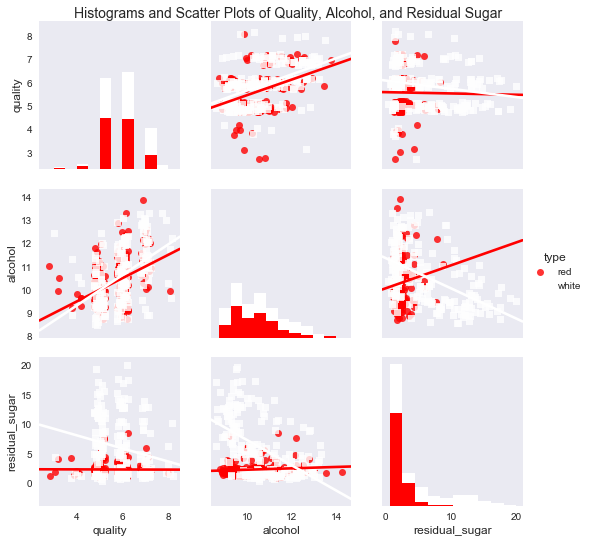

In [5]:
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols, glm

print(wineDF.corr())  #corr 函数可以计算出数据集中所有变量两两之间的线性相关性
wine=wineDF
# 从红葡萄酒和白葡萄酒的数据中取出一个 “小” 样本来进行绘图 
def take_sample(data_frame, replace=False, n=200): 
    return data_frame.loc[np.random.choice(data_frame.index,replace=replace, size=n)] 
reds_sample = take_sample(wine.loc[wine['type']=='red', :]) 
whites_sample = take_sample(wine.loc[wine['type']=='white', :]) 
wine_sample = pd.concat([reds_sample, whites_sample]) 
wine['in_sample'] = np.where(wine.index.isin(wine_sample.index), 1.,0.) 
print(pd.crosstab(wine.in_sample, wine.type, margins=True)) 
# 查看成对变量之间的关系 
sns.set_style("dark") 
g = sns.pairplot(wine_sample, kind='reg', plot_kws={"ci": False,"x_jitter": 0.25, "y_jitter": 0.25}, hue='type', diag_kind='hist', 
diag_kws={"bins": 10, "alpha": 1.0}, palette=dict(red="red", white="white"),markers=["o", "s"], vars=['quality', 'alcohol', 'residual_sugar']) 
print(g) 
plt.suptitle('Histograms and Scatter Plots of Quality, Alcohol, and Residual Sugar', fontsize=14, horizontalalignment='center', verticalalignment='top',x=0.5, y=0.999)
plt.show()

seaborn库的pairplot 函数可以创建一个统计图矩阵。主对角线上的图以直方图或密度图的形式显示了每个变量的单变量分布，对角线之外的图以散点图的形式显示了每两个变量之间的双变量分布，散点图中可以有回归直线，也可以没有。
上面画出的统计图显示了葡萄酒质量、酒精含量和残余糖分之间的关系。红条和红点表示红葡萄酒，白条和白点表示白葡萄酒。因为质量评分都是整数，所以我加上了一点振动，这样更容易看出数据在何处集中。

### 葡萄酒质量预测
当我们有一个新的葡萄酒成分的记录时，通过预测算法可以根据这些成分预测这种葡萄酒的质量评分。

In [6]:
# 使用葡萄酒数据集中的前10个观测创建10个 “新” 观测 
# 新观测中只包含模型中使用的自变量 
independent_variables = wine[wine.columns.difference(['quality', 'type','in_sample'])]

new_observations = wine.loc[wine.index.isin(range(10)),independent_variables.columns] 
# 基于新观测中的葡萄酒特性预测质量评分 
my_formula = 'quality ~ alcohol + chlorides + citric_acid + density + fixed_acidity + free_sulfur_dioxide + pH + residual_sugar + sulphates + total_sulfur_dioxide + volatile_acidity' 
 
lm = ols(my_formula, data=wine).fit() 
y_predicted = lm.predict(new_observations) 
# 将预测值保留两位小数输出
y_predicted_rounded = [round(score, 2) for score in y_predicted] 
print(y_predicted_rounded)


[5.0, 4.9199999999999999, 5.0300000000000002, 5.6799999999999997, 5.0, 5.04, 5.0199999999999996, 5.2999999999999998, 5.2400000000000002, 5.6900000000000004]


## 客户流失数据统计

### 客户流失数据集

客户流失数据集是一个包含 3333 条记录的文件，其中的观测是电信公司现有的和曾经的客户。这个文件有 1 个输出变量和 20 个输入变量。输出变量 Churn是一个布尔型变量，表示在数据收集的时候，客户是否已经流失（是否还是电信公司的客户） 。输入变量是客户的电话计划和通话行为的特征，包括状态、账户时间、区号、电话号码、是否有国际通话计划、是否有语音信箱、语音信箱消息数量、白天通话时长、白天通话次数、白天通话费用、傍晚通话时长、傍晚通话次数、傍晚通话费用、夜间通话时长、夜间通话次数、夜间通话费用、国际通话时长、国际通话次数、国际通话费用和客户服务通话次数。
这个数据集可以从[Churn](https://raw.githubusercontent.com/EricChiang/churn/master/data/churn.csv)下载。

简单的描述性统计：

In [9]:
import numpy as np 
import pandas as pd 

churn = pd.read_csv('./churn.csv', sep=',', header=0) 
churn.columns = [heading.lower() for heading in churn.columns.str.replace(' ', '_').str.replace("\'", "").str.strip('?')] 
churn['churn01'] = np.where(churn['churn'] == 'True.', 1., 0.) 
print(churn.describe())

       account_length    area_code  vmail_message     day_mins    day_calls  \
count     3333.000000  3333.000000    3333.000000  3333.000000  3333.000000   
mean       101.064806   437.182418       8.099010   179.775098   100.435644   
std         39.822106    42.371290      13.688365    54.467389    20.069084   
min          1.000000   408.000000       0.000000     0.000000     0.000000   
25%         74.000000   408.000000       0.000000   143.700000    87.000000   
50%        101.000000   415.000000       0.000000   179.400000   101.000000   
75%        127.000000   510.000000      20.000000   216.400000   114.000000   
max        243.000000   510.000000      51.000000   350.800000   165.000000   

        day_charge     eve_mins    eve_calls   eve_charge   night_mins  \
count  3333.000000  3333.000000  3333.000000  3333.000000  3333.000000   
mean     30.562307   200.980348   100.114311    17.083540   200.872037   
std       9.259435    50.713844    19.922625     4.310668    50.57

### 逻辑斯蒂回归
逻辑斯蒂回归的语法与线性回归有一点区别。对于逻辑斯蒂回归，需要分别设置因变量和自变量。

In [10]:
import seaborn as sns 
import matplotlib.pyplot as plt 
import statsmodels.api as sm 
import statsmodels.formula.api as smf 

churn['total_charges'] = churn['day_charge'] +churn['eve_charge'] +churn['night_charge'] + churn['intl_charge'] 
factor_cut = pd.cut(churn.total_charges, 5, precision=2) 

grouped = churn.custserv_calls.groupby(factor_cut) 
dependent_variable = churn['churn01'] 
independent_variables = churn[['account_length', 'custserv_calls','total_charges']] 
independent_variables_with_constant = sm.add_constant(independent_variables,prepend=True) 
 
logit_model = sm.Logit(dependent_variable, independent_variables_with_constant).fit() 
 
print(logit_model.summary()) 
print("\nQuantities you can extract from the result:\n%s" % dir(logit_model)) 
print("\nCoefficients:\n%s" % logit_model.params) 
print("\nCoefficient Std Errors:\n%s" % logit_model.bse)



Optimization terminated successfully.
         Current function value: 0.363480
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                churn01   No. Observations:                 3333
Model:                          Logit   Df Residuals:                     3329
Method:                           MLE   Df Model:                            3
Date:                Thu, 22 Mar 2018   Pseudo R-squ.:                  0.1216
Time:                        21:39:06   Log-Likelihood:                -1211.5
converged:                       True   LL-Null:                       -1379.1
                                        LLR p-value:                 2.234e-72
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -7.2205      0.394    -18.309      0.000      -7.993      -6.448
account_length   

### 客户流失情况预测

与前面的葡萄酒质量预测一样，我们也可以使用拟合模型来对“新”输入的数据进行预测。



In [11]:
# 在churn数据集中 
# 使用前10个观测创建10个 “新” 观测 
new_observations = churn.loc[churn.index.isin(range(10)),independent_variables.columns] 
new_observations_with_constant = sm.add_constant(new_observations, prepend=True) 
 
# 基于新观测的账户特性 
# 预测客户流失可能性 
y_predicted = logit_model.predict(new_observations_with_constant) 
 
# 将预测结果保留两位小数并打印到屏幕上 
y_predicted_rounded = [round(score, 2) for score in y_predicted] 
print(y_predicted_rounded)

[0.25, 0.089999999999999997, 0.080000000000000002, 0.20000000000000001, 0.12, 0.10000000000000001, 0.48999999999999999, 0.029999999999999999, 0.22, 0.23999999999999999]


《Python数据分析基础》在第7章用了两个例子演示了描述性统计和建模的知识，有些代码还是有些难以理解的，可以通过其他资料进行深入理解。下一篇笔记是关于**按计划自动运行脚本**的，可以在电脑里设置代码每天自动运行，下一章可以使用之前写的代码，基本不需要再写代码了。
